In [5]:
import os
import torch.optim as optim

import cv2
import numpy as np
from tqdm import tqdm

In [9]:
Class={

}

foler_name=[name for name in os.listdir(r"C:\Users\swaya\Desktop\Timepass\python\NExt_one_week\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train")]

for i in range(len(foler_name)):
    Class[i]=foler_name[i]

In [10]:
Class

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___healthy',
 6: 'Cherry_(including_sour)___Powdery_mildew',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___healthy',
 10: 'Corn_(maize)___Northern_Leaf_Blight',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___healthy',
 14: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___healthy',
 22: 'Potato___Late_blight',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___healthy',
 27: 'Strawberry___Leaf_scorch',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [11]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [12]:
Class_r = {value: key for key, value in Class.items()}


In [13]:
train_directory = r"C:\Users\swaya\Desktop\Timepass\python\NExt_one_week\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train"

In [14]:
image_size = 224
batch_size=32

In [15]:
data_transform=transforms.Compose([
    transforms.Resize((image_size,image_size)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [16]:
train_dataset = datasets.ImageFolder(
    root=train_directory,
    transform=data_transform
)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..1.5593902].


Image batch shape: torch.Size([32, 3, 224, 224])
Label batch shape: torch.Size([32])


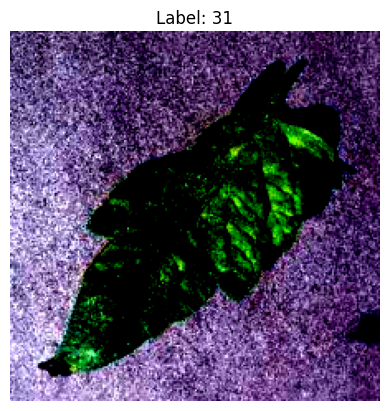

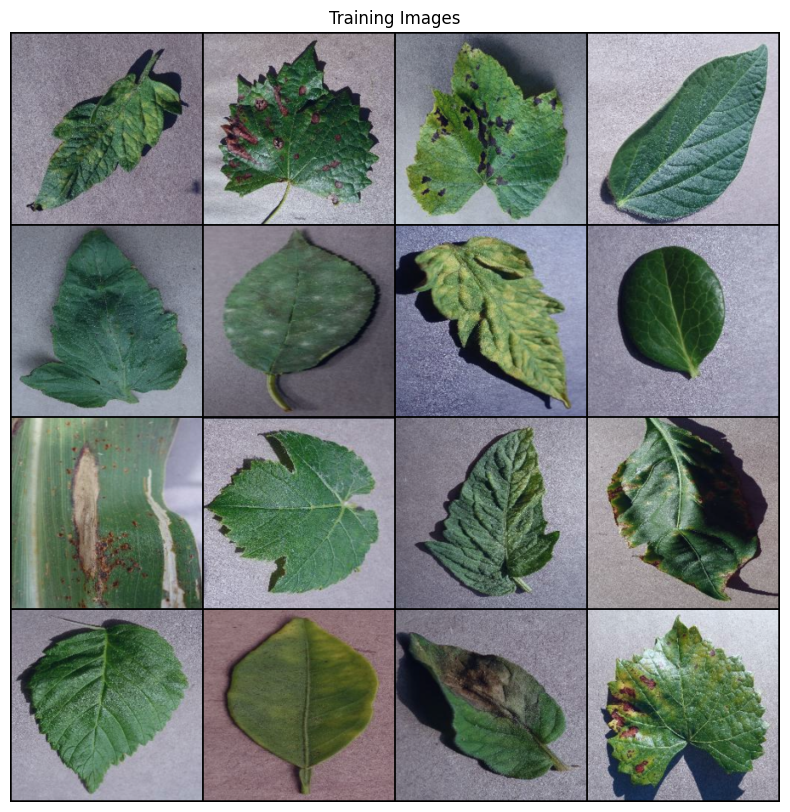

In [53]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Print shape info
print("Image batch shape:", images.shape)   # [batch_size, channels, height, width]
print("Label batch shape:", labels.shape)

# Show a single image with label
plt.imshow(images[0].permute(1, 2, 0))  # Convert from [C, H, W] to [H, W, C]
plt.title(f"Label: {labels[0].item()}")
plt.axis('off')
plt.show()

import torchvision.utils as vutils

# Show first batch of images in a grid
plt.figure(figsize=(10, 10))
plt.axis("off")
plt.title("Training Images")
plt.imshow(
    vutils.make_grid(images[:16], nrow=4, normalize=True).permute(1, 2, 0)
)
plt.show()


In [51]:
import matplotlib.pyplot as plt
import torchvision
import torch

In [54]:
# Save the model's learned parameters (weights and biases)
model_path = 'plant_disease_model_resnet34.pth'
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")

Model saved to plant_disease_model_resnet34.pth


In [18]:
if __name__ == '__main__':
    # Get one batch of training images
    images, labels = next(iter(train_loader))

    print(f"Shape of one batch of images: {images.shape}") # Should be [batch_size, 3, image_size, image_size]
    print(f"Shape of one batch of labels: {labels.shape}") # Should be [batch_size]

Shape of one batch of images: torch.Size([32, 3, 224, 224])
Shape of one batch of labels: torch.Size([32])


In [1]:
import torch.nn as nn
from torchvision import models

In [6]:
class PlantDiseaseModel(nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.resnet=models.resnet34(pretrained=True)

        for param in self.resnet.parameters():
            param.requires_grad=False

        num_ftrs=self.resnet.fc.in_features
        self.resnet.fc=nn.Linear(num_ftrs,num_classes)
    def forward(self,x):
        return self.resnet(x)

In [7]:
num_classes = 38
model = PlantDiseaseModel(num_classes)
Loss = nn.CrossEntropyLoss()
num_epochs = 10

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\swaya/.cache\torch\hub\checkpoints\resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [17:55<00:00, 81.2kB/s]  


In [25]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.to(device)


In [30]:
for epoch in range(num_epochs):
    model.train()
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = Loss(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        progress_bar.set_postfix(loss=loss.item())

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch 1/10:   0%|          | 0/2197 [00:00<?, ?it/s]

Epoch [1/10], Loss: 0.2039


Epoch 2/10:   0%|          | 0/2197 [00:00<?, ?it/s]

Epoch [2/10], Loss: 0.0964


Epoch 3/10:   0%|          | 0/2197 [00:00<?, ?it/s]

Epoch [3/10], Loss: 0.2006


Epoch 4/10:   0%|          | 0/2197 [00:00<?, ?it/s]

Epoch [4/10], Loss: 0.0707


Epoch 5/10:   0%|          | 0/2197 [00:00<?, ?it/s]

Epoch [5/10], Loss: 0.0342


Epoch 6/10:   0%|          | 0/2197 [00:00<?, ?it/s]

Epoch [6/10], Loss: 0.3103


Epoch 7/10:   0%|          | 0/2197 [00:00<?, ?it/s]

Epoch [7/10], Loss: 0.3171


Epoch 8/10:   0%|          | 0/2197 [00:00<?, ?it/s]

Epoch [8/10], Loss: 0.2530


Epoch 9/10:   0%|          | 0/2197 [00:00<?, ?it/s]

Epoch [9/10], Loss: 0.0457


Epoch 10/10:   0%|          | 0/2197 [00:00<?, ?it/s]

Epoch [10/10], Loss: 0.1008


In [24]:
import torch

# Set the device to a GPU if available, otherwise use the CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [29]:
from tqdm.auto import tqdm

In [42]:
test_dataset = datasets.ImageFolder(
    root=test_path,
    transform=data_transform
)

In [43]:
test_path=r"C:\Users\swaya\Desktop\Timepass\python\NExt_one_week\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"

In [44]:
train_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=True
)

In [46]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm # For a progress bar

# --- Define Transformations for the Test Set ---
# Note: Use the same normalization as your training data
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# --- Create the Dataset and DataLoader ---
test_path = r"C:\Users\swaya\Desktop\Timepass\python\NExt_one_week\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid"
test_dataset = datasets.ImageFolder(root=test_path, transform=test_transforms)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

In [47]:
# Assuming 'model' and 'device' are already defined from your training script

# Set model to evaluation mode
model.eval()

n_correct = 0
n_samples = 0

# No need to track gradients for testing
with torch.no_grad():
    progress_bar = tqdm(test_loader, desc="Testing")
    for images, labels in progress_bar:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Get predictions: the class with the highest score
        _, predicted = torch.max(outputs.data, 1)

        # Update counts
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

# Calculate and print the final accuracy
accuracy = 100.0 * n_correct / n_samples
print(f'\nAccuracy of the model on the {n_samples} test images: {accuracy:.2f} %')

Testing: 100%|██████████| 550/550 [03:16<00:00,  2.80it/s]


Accuracy of the model on the 17572 test images: 91.05 %


Validation test

In [55]:
# 1. Transformations for the training set with data augmentation
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# 2. Transformations for the validation/test set (NO augmentation)
test_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


# 3. Create the datasets using the new transforms
train_dataset = datasets.ImageFolder(
    root=train_directory, # Your path to the training folder
    transform=train_transforms
)

test_dataset = datasets.ImageFolder(
    root=test_path, # Your path to the validation folder
    transform=test_transforms
)

# 4. Create the data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Now, retrain the model from scratch using the same training loop as before.

In [56]:
# 1. Load your previously trained model
model = PlantDiseaseModel(num_classes)
model.load_state_dict(torch.load('plant_disease_model_resnet34.pth'))
model.to(device)

# 2. Unfreeze all the layers for fine-tuning
for param in model.parameters():
    param.requires_grad = True

# 3. Set up an optimizer with a very low learning rate
# A lower learning rate is crucial for fine-tuning to prevent
# destroying the pre-trained weights.
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# 4. Train again for a few more epochs (e.g., 5)
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    progress_bar = tqdm(train_loader, desc=f"Fine-Tuning Epoch {epoch+1}/{num_epochs}")
    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        outputs = model(images)
        loss = Loss(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        progress_bar.set_postfix(loss=loss.item())

    print(f'Fine-Tuning Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# After fine-tuning, test the accuracy again on your test_loader.
# You should see an improvement over your original 91.05% score.

C:\Users\swaya\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\swaya\AppData\Local\Programs\Python\Python310\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\swaya\AppData\Local\Temp\ipykernel_15904\3083479424.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickl

Fine-Tuning Epoch [1/5], Loss: 0.2892


Fine-Tuning Epoch 2/5: 100%|██████████| 2197/2197 [13:09<00:00,  2.78it/s, loss=0.26]   


Fine-Tuning Epoch [2/5], Loss: 0.2600


Fine-Tuning Epoch 3/5: 100%|██████████| 2197/2197 [13:23<00:00,  2.74it/s, loss=0.0678] 


Fine-Tuning Epoch [3/5], Loss: 0.0678


Fine-Tuning Epoch 4/5: 100%|██████████| 2197/2197 [17:47<00:00,  2.06it/s, loss=0.103]  


Fine-Tuning Epoch [4/5], Loss: 0.1028


Fine-Tuning Epoch 5/5: 100%|██████████| 2197/2197 [14:40<00:00,  2.50it/s, loss=0.135]  

Fine-Tuning Epoch [5/5], Loss: 0.1348


In [58]:
# Assuming 'model' and 'device' are already defined from your training script

# Set model to evaluation mode
model.eval()

n_correct = 0
n_samples = 0

# No need to track gradients for testing
with torch.no_grad():
    progress_bar = tqdm(test_loader, desc="Testing")
    for images, labels in progress_bar:
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)

        # Get predictions: the class with the highest score
        _, predicted = torch.max(outputs.data, 1)

        # Update counts
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

# Calculate and print the final accuracy
accuracy = 100.0 * n_correct / n_samples
print(f'\nAccuracy of the model on the {n_samples} test images: {accuracy:.2f} %')

Testing: 100%|██████████| 550/550 [00:53<00:00, 10.28it/s]


Accuracy of the model on the 17572 test images: 98.63 %


'C:\\Users\\swaya\\Desktop\\Timepass\\python\\NExt_one_week\\New Plant Diseases Dataset(Augmented)\\New Plant Diseases Dataset(Augmented)\\valid'

OUTPUT

In [86]:
from PIL import Image
import torch
img_path = r"C:\Users\swaya\Desktop\Timepass\python\NExt_one_week\test\test\AppleCedarRust4.JPG"
img_path1=r"C:\Users\swaya\Desktop\Timepass\python\NExt_one_week\test\test\TomatoYellowCurlVirus4.JPG"
image = Image.open(img_path1)
image = test_transforms(image).unsqueeze(0).to(device)  # Add batch dimension

output = model(image)


In [87]:
print(output)

tensor([[-25.1076, -30.7845, -20.3778, -21.1866, -23.0284, -17.7169, -21.0945,
         -19.0715, -26.3522, -20.7422, -24.6896, -23.9923, -20.8648, -22.3595,
         -25.0550, -16.3740, -22.4343, -29.2261, -17.8505, -16.6530, -22.4270,
         -18.8211, -23.1321, -15.9767, -24.2700, -20.8753, -21.1823, -17.6534,
          -7.8072, -12.2212, -11.1225, -16.3164, -15.7074, -13.2710, -19.0636,
          -0.4528, -15.3425, -16.0864]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [88]:
_, predicted_class = torch.max(output, 1)

In [89]:
predicted_class.item()
Class[predicted_class.item()]

'Tomato___Target_Spot'